# Import packages

In [1]:
import os
import cmaps
import cmaps as cm
import cmocean
import numpy as np
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset
from datetime import date
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import Polygon
from matplotlib import rcParams
from xarrayMannKendall import Mann_Kendall_test
directory   = '/srv/scratch/z3533156'
from dask.distributed import Client
from astropy import convolution
rcParams['font.family'] = 'sans-serif'

In [2]:
dataset0  = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_mean.mat')
dataset1  = xr.open_dataset(directory+'/BRAN_WBC/SO/ERA5/ERA5_monthly_Tx_LS.nc')
dataset2  = xr.open_dataset(directory+'/BRAN_WBC/SO/ERA5/ERA5_monthly_u10_LS.nc')
dataset3  = sio.loadmat(directory+'/BRAN_WBC/SO/Figure2_trend.mat')
sst_trend = dataset3['sst_trend'][:,:-1]*3650
sst_mean  = dataset0['oisst_mean'][:,:-1]
lon       = np.tile(dataset1.lon, (len(dataset1.lat),1)).transpose()+180
lat       = np.tile(dataset1.lat, (len(dataset1.lon),1))
u10_0     = np.nanmean(dataset2.u10.values,axis=0).transpose()
u10_mean  = np.fliplr(np.concatenate((u10_0[720:,360:601],u10_0[:720,360:601]),axis=0))
u10_mean[np.where(np.isnan(sst_mean))]=np.nan
u10_mean[np.where((lon<150) & (lat>-30))]=np.nan
u10_mean[np.where(lat>-10)]=np.nan

# Plot the Southern Hemisphere

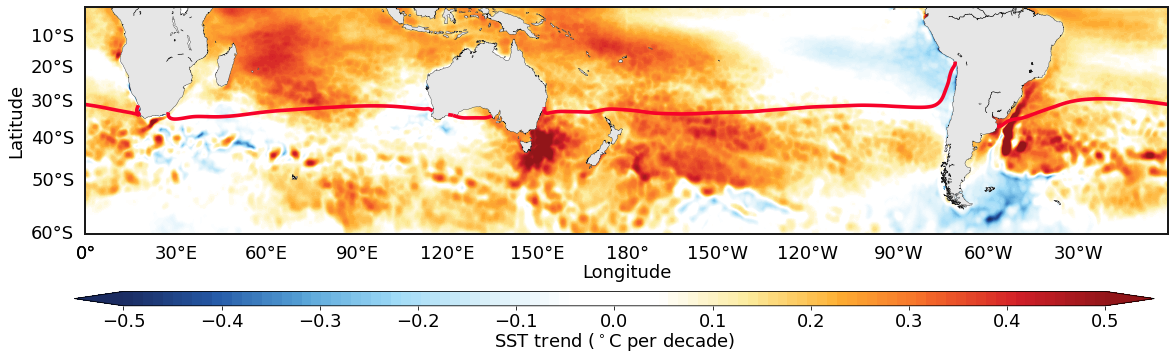

In [8]:
fig_ratio=0.9
fig = plt.figure(figsize=(30, 20))
gs=gridspec.GridSpec(3,3)
labelfont=18
padspacescale=10
labelpadscale=2
linefont = 1.2
scale    = 1.0
levels1  = np.linspace(-0.5,0.5,100)
tick_marks1 = np.linspace(-0.5,0.5,11)
cmaps1  = cm.BlueWhiteOrangeRed
##################################################################################
ax = fig.add_subplot(gs[0:2])
l, b, w, h = ax.get_position().bounds
m   = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat= 0,llcrnrlon=0,urcrnrlon=360,resolution='l')    
m.drawmeridians(np.arange(0,360, 30),labels=[0,0,0,1],linewidth=0*linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')
m.drawparallels(np.arange(-60,-0, 10),labels=[1,0,0,0],linewidth=0*linefont,dashes=[2,2],color='.5',fontsize=labelfont,family='sans-serif')    
m.drawcoastlines(color='0.1',  linewidth=0.3*linefont)
m.drawmapboundary(color='0.1', linewidth=0.5*linefont)
m.fillcontinents(color='0.9', lake_color='white')
x, y = m(lon, lat)
CB=m.contourf(x, y, sst_trend,cmap=cmaps1,levels=levels1,origin='lower',extend='both')     
CS=m.contour(x, y,u10_mean,np.arange(-0.01,0.01,2),linewidths=3*linefont,linestyles='solid',colors='xkcd:cherry red')
ax.set_position([l, b, scale*w, scale*h])   
ax.spines['left'].set_linewidth(labelpadscale)
ax.spines['top'].set_linewidth(labelpadscale)
ax.spines['right'].set_linewidth(labelpadscale)
ax.spines['bottom'].set_linewidth(labelpadscale)
plt.xlabel('Longitude',fontsize=labelfont,labelpad=3*padspacescale,family='sans-serif')
plt.ylabel('Latitude',fontsize=labelfont,labelpad=6*padspacescale,family='sans-serif')
ax.axes.xaxis.set_tick_params(pad=0)
ax.axes.yaxis.set_tick_params(pad=0)
cbaxes1     = fig.add_axes([0.12, 0.64, 0.5, 0.01])
cb1 = plt.colorbar(CB,orientation='horizontal',cax = cbaxes1)
cb1.set_ticks(tick_marks1)
cb1.ax.tick_params(labelsize=labelfont)
cb1.set_label(r'SST trend ($^\circ$C per decade)', fontsize=labelfont,labelpad=0,family='sans-serif')